In [82]:
import os
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import matplotlib.cm as cm
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import  StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import itertools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from sklearn.manifold import TSNE
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings('ignore')
# DECISION TREE
import graphviz

In [83]:
df_original = pd.read_excel("WonderfulWinesoftheWorld.xlsx")

In [84]:
df = df_original.copy()

In [85]:
df.shape

(10001, 30)

In [86]:
df.head()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,Rand
0,5325.0,653.0,55.0,20.0,78473.0,0.0,0.0,20.0,18.0,826.0,...,0,0,0,0,0,0,0,0,0,0.240092
1,3956.0,1041.0,75.0,18.0,105087.0,0.0,0.0,36.0,33.0,1852.0,...,0,0,0,1,0,0,0,0,0,0.435944
2,3681.0,666.0,18.0,12.0,27984.0,1.0,0.0,4.0,56.0,39.0,...,0,0,0,0,0,0,0,0,0,0.350584
3,2829.0,1049.0,42.0,16.0,61748.0,1.0,1.0,2.0,46.0,37.0,...,0,0,0,0,0,0,0,1,1,0.594082
4,8788.0,837.0,47.0,16.0,65789.0,0.0,1.0,2.0,3.0,36.0,...,0,0,0,0,0,0,0,0,0,0.782248


In [87]:
#prof = ProfileReport(df)

In [88]:
#prof

In [89]:
df.duplicated().sum()

0

In [90]:
df.isna().sum().sum()

2

In [91]:
df.head().sort_index()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,Rand
0,5325.0,653.0,55.0,20.0,78473.0,0.0,0.0,20.0,18.0,826.0,...,0,0,0,0,0,0,0,0,0,0.240092
1,3956.0,1041.0,75.0,18.0,105087.0,0.0,0.0,36.0,33.0,1852.0,...,0,0,0,1,0,0,0,0,0,0.435944
2,3681.0,666.0,18.0,12.0,27984.0,1.0,0.0,4.0,56.0,39.0,...,0,0,0,0,0,0,0,0,0,0.350584
3,2829.0,1049.0,42.0,16.0,61748.0,1.0,1.0,2.0,46.0,37.0,...,0,0,0,0,0,0,0,1,1,0.594082
4,8788.0,837.0,47.0,16.0,65789.0,0.0,1.0,2.0,3.0,36.0,...,0,0,0,0,0,0,0,0,0,0.782248


In [92]:
df.columns

Index(['Custid', 'Dayswus', 'Age', 'Edu', 'Income', 'Kidhome', 'Teenhome',
       'Freq', 'Recency', 'Monetary', 'LTV', 'Perdeal', 'Dryred', 'Sweetred',
       'Drywh', 'Sweetwh', 'Dessert', 'Exotic', 'WebPurchase', 'WebVisit',
       'SMRack', 'LGRack', 'Humid', 'Spcork', 'Bucket', 'Access', 'Complain',
       'Mailfriend', 'Emailfriend', 'Rand'],
      dtype='object')

## Initial Data Visualization

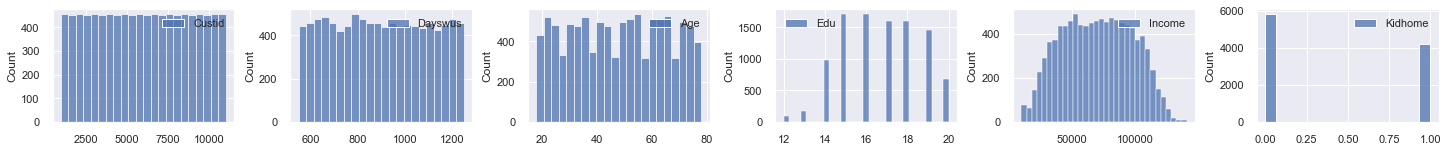

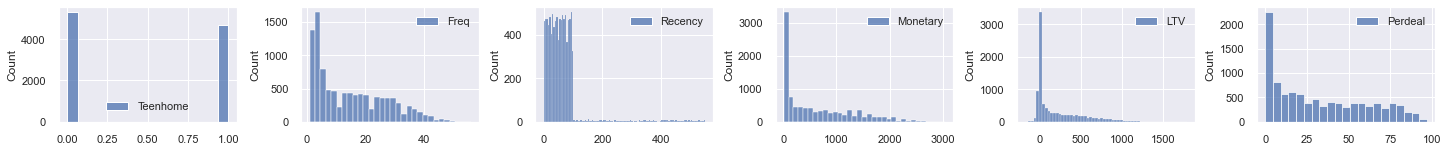

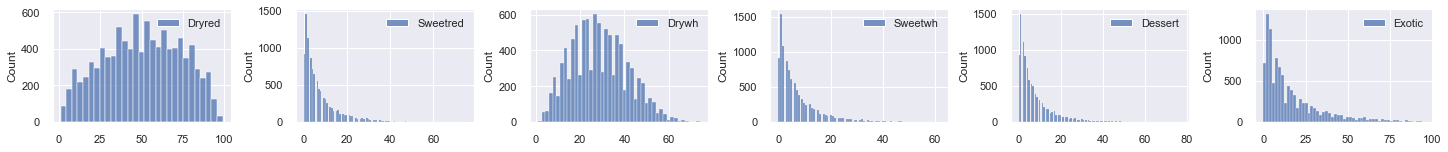

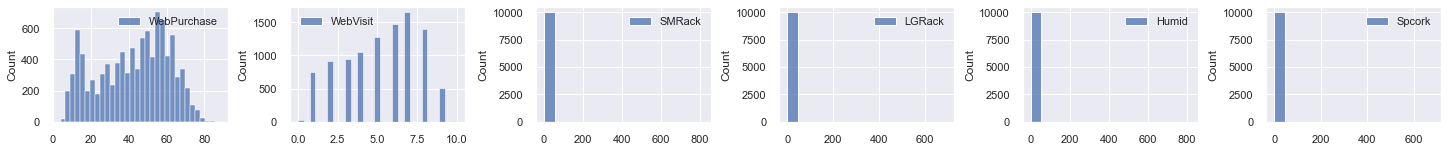

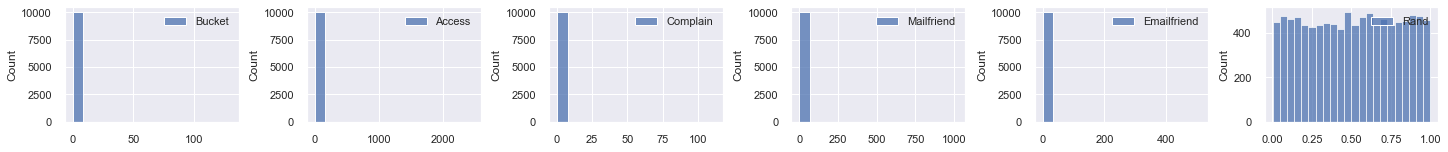

In [93]:
sns.set()

plot_features = df.columns
#fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(30,3), constrained_layout=True)
j=0
k=1
for i in range(5):
    fig, axes = plt.subplots(1,6, figsize=(20,2), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.histplot(data=df.iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

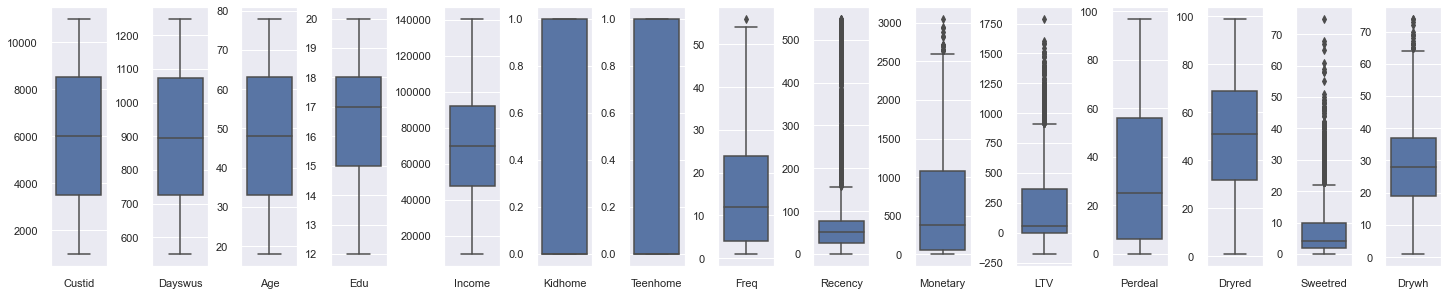

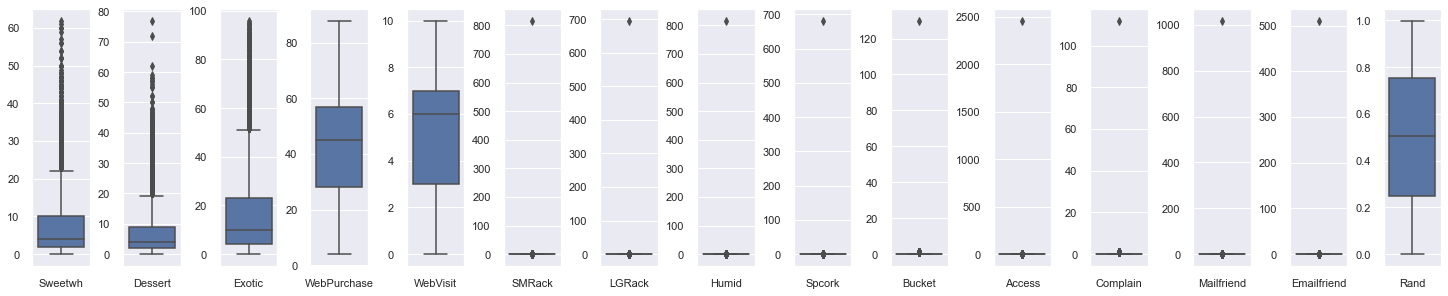

In [94]:
sns.set()

plot_features = df.columns
#fig, axes = plt.subplots(1, len(plot_features), figsize=(45,8), constrained_layout=True)
j=0
k=1


for i in range(2):
    fig, axes = plt.subplots(1,int(len(plot_features)/2), figsize=(20,4), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.boxplot(data=df.iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

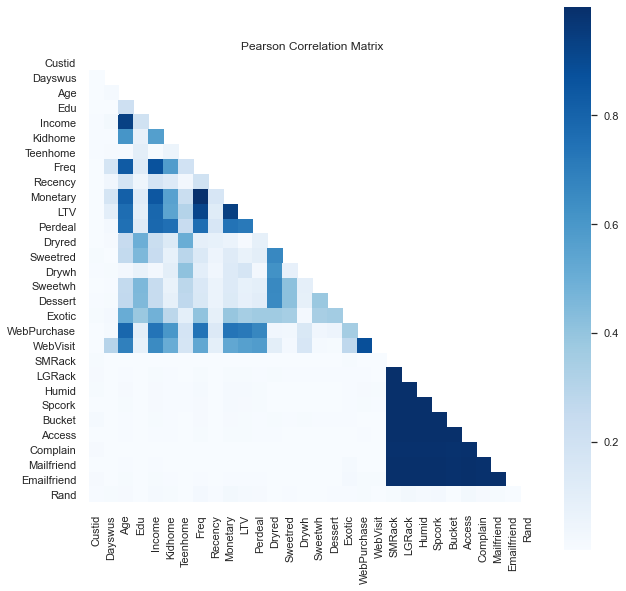

In [95]:
def heatmap_pearson(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Pearson Correlation Matrix')
    plt.show()
    
heatmap_pearson(df.corr(method='pearson').abs())

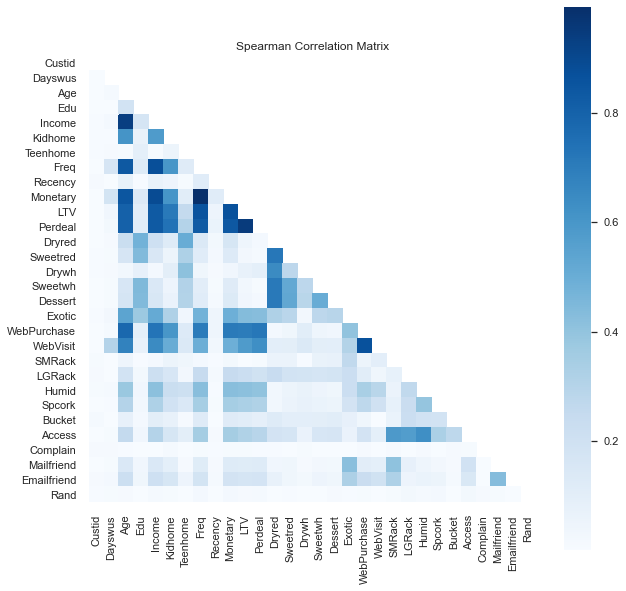

In [96]:
def heatmap_spearman(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Spearman Correlation Matrix')
    plt.show()
    
heatmap_spearman(df.corr(method='spearman').abs())

In [97]:
#fazer as outras correlacoes

As we can see there are some errors/outliers that are needed to be handled. Therefore they must be removed from the dataset.

The outliers quickly identified are in the SMRack, LGRack, Humid, Spcork, Bucket, Access, Complain, Mailfriend and Emailfriend, since the values in these columns are percentages and there are values above 100%.

The column Custid will be the new index of the dataframe.

The column Rand will be dropped since it only returns a random number between 0 and 1.

In [98]:
#fazer histogramas, remover erros, outliers(dbscan, lof)

In [99]:
df = df_original.copy()

In [100]:
df.shape

(10001, 30)

In [101]:
df.drop(["Rand"],axis=1,inplace=True)

In [102]:
df.set_index('Custid',inplace=True)

In [103]:
df.sort_index(inplace=True)

In [104]:
df.replace(" ", np.nan, inplace=True)

In [105]:
filters = (
    (df["SMRack"]>100) | (df["LGRack"]>100) | (df["Humid"]>100) | (df["Spcork"]>100) |
    (df["Bucket"]>100) | (df["Access"]>100) | (df["Complain"]>100) | (df["Mailfriend"]>100) | (df["Emailfriend"]>100)
          )
df1=df[filters]

In [106]:
to_remove = list(df1.index)

In [107]:
df = df.drop(to_remove)

In [108]:
df.shape

(10000, 28)

There aren't any more na values.

In [109]:
df.isna().sum().sum()

0

Separation of non-metric features and metric features.

In [110]:
non_metric_features = ["Kidhome","Teenhome", "SMRack", "LGRack", "Humid",
                       "Spcork", "Bucket", "Complain", "Mailfriend", "Emailfriend"]

In [111]:
metric_features = df.columns.drop(non_metric_features).to_list()

## Outliers

#### Isolation Forest

In [112]:
data_central = df.copy()

In [113]:
iso = IsolationForest(contamination=0.01)
iso_df = iso.fit_predict(data_central[metric_features])

In [114]:
mask_out =iso_df == -1
outliers_if=data_central[mask_out]
data_central.drop(outliers_if.index,inplace=True)

In [115]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / df_original.shape[0], 4), 5)*100, "%")

Percentage of data removed after outliers: 1.01 %


In [116]:
#reduzir a percentagem de outliers removed

#### Minimum Covariance Determinant


In [117]:
ee = EllipticEnvelope(contamination=0.01)
ee_df = ee.fit_predict(data_central[metric_features])

In [118]:
mask_out =ee_df == -1
outliers_mcd=data_central[mask_out]
data_central.drop(outliers_mcd.index,inplace=True)

In [119]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / df_original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 2.0 %


In [120]:
df.drop(outliers_if.index,inplace=True)
df.drop(outliers_mcd.index,inplace=True)

In [121]:
df.shape

(9801, 28)

## Data Visualization after some Feature Engeneering

Metric Features Histogram


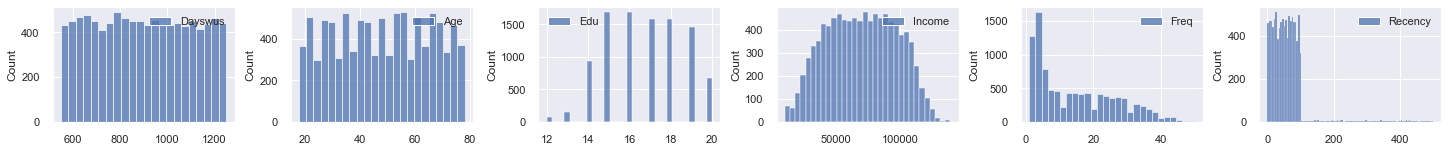

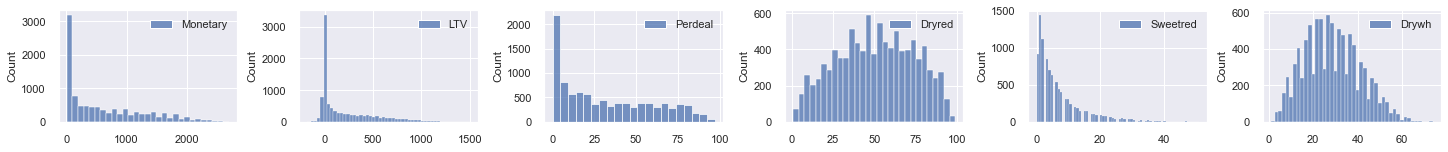

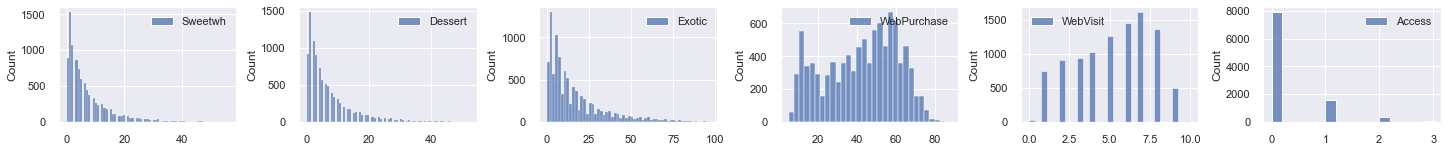

In [122]:
sns.set()

plot_features = df[metric_features]
#fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(30,3), constrained_layout=True)
j=0
k=1
print("Metric Features Histogram")
for i in range(3):
    fig, axes = plt.subplots(1,6, figsize=(20,2), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.histplot(data=df[metric_features].iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

Non Metric Features Histogram


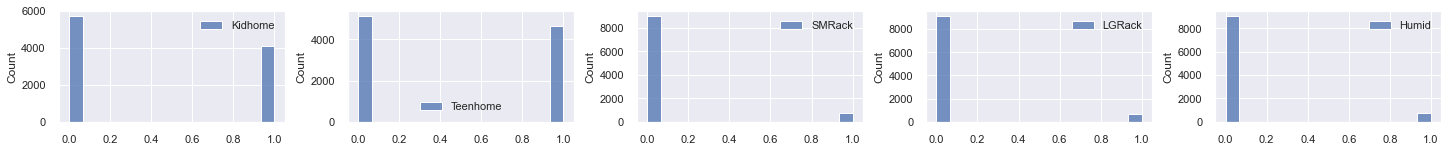

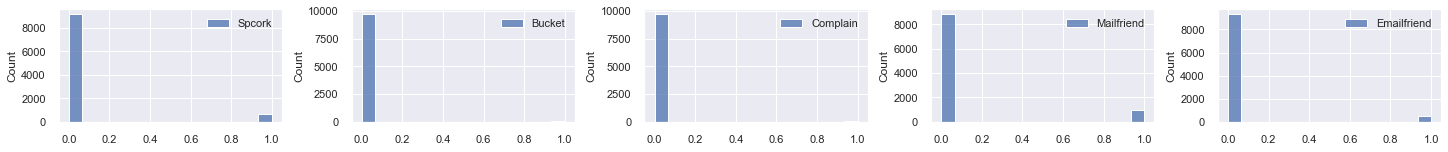

In [123]:
sns.set()

plot_features = df[non_metric_features]
#fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(30,3), constrained_layout=True)
j=0
k=1
print("Non Metric Features Histogram")
for i in range(2):
    fig, axes = plt.subplots(1,5, figsize=(20,2), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.histplot(data=df[non_metric_features].iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

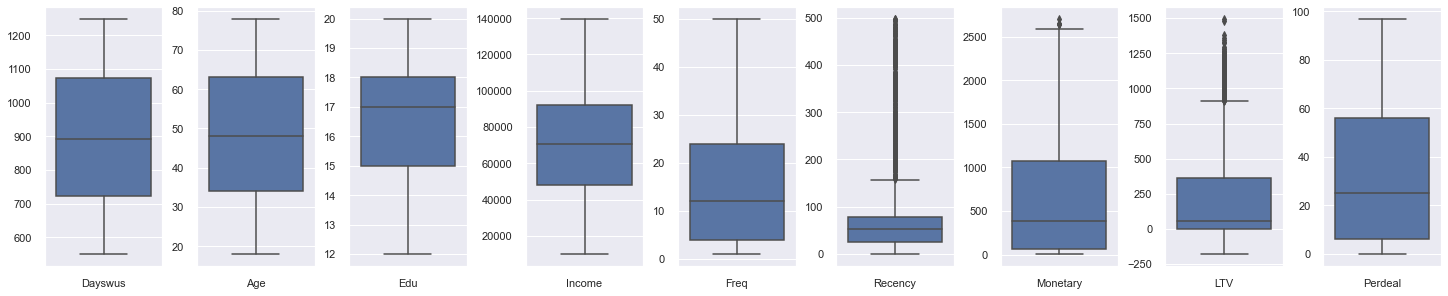

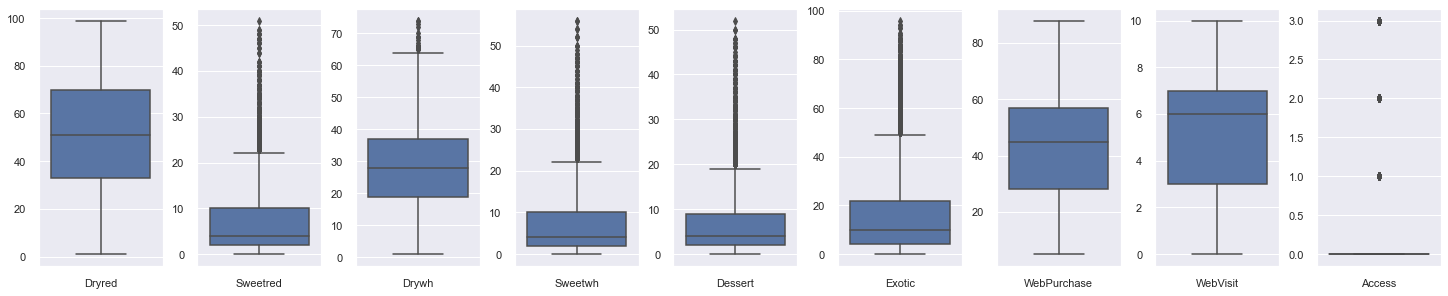

In [124]:
sns.set()

plot_features = df[metric_features].columns
#fig, axes = plt.subplots(1, len(plot_features), figsize=(45,8), constrained_layout=True)
j=0
k=1


for i in range(2):
    fig, axes = plt.subplots(1,int(len(plot_features)/2), figsize=(20,4), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.boxplot(data=df[metric_features].iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

In [125]:
# Pairwise Relationship of Numerical Variables
#sns.set()
#features = metric_features

# Setting pairplot
#sns.pairplot(data=df[metric_features], diag_kind="hist")

# Layout
#plt.subplots_adjust(top=0.95)
#plt.suptitle("Pairwise Relationship of Numerical Variables by Target", fontsize=20)

#plt.show()

<div class="alert alert-block alert-success">

## 3) Clustering
    
</div>

In [126]:
def plotKElbow(cluster,data,metric):
    visualizer = KElbowVisualizer(cluster, k=(2,12), metric=metric, timings=False,locate_elbowbool=False)
    visualizer.fit(data)        
    visualizer.show()   
    

In [127]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        hclabels = cluster.fit_predict(df) #get cluster labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

In [128]:
def kmeans_cluster(df,n_clust):
    kmclust = KMeans(n_clusters=n_clust, init='k-means++', n_init=15, random_state=1)
    df_labels = kmclust.fit_predict(df)
    return df_labels


In [129]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        #ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [130]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

<div class="alert alert-block alert-info">

### Standardaization
    
</div>

In [131]:
scaler = StandardScaler().fit(df)
standard_df=pd.DataFrame(scaler.transform(df),index=df.index, columns=df.columns)

<div class="alert alert-block alert-info">

### Select the best features
    
</div>

In [132]:
cluster = KMeans(random_state=0)

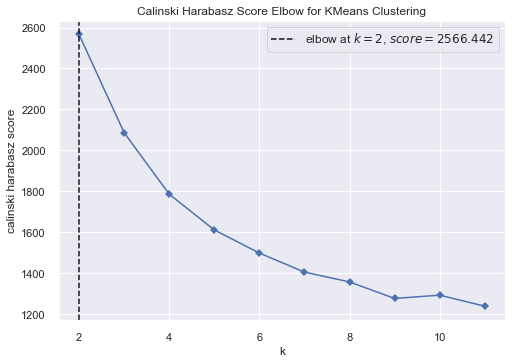

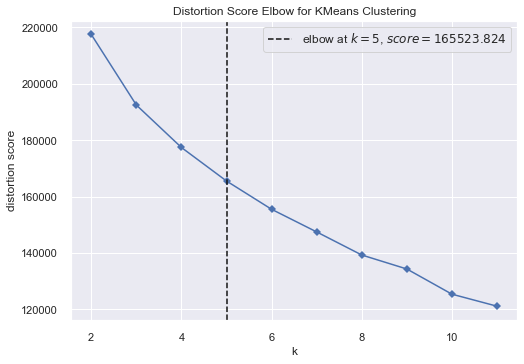

In [133]:
plotKElbow(cluster,standard_df,'calinski_harabasz')
plotKElbow(cluster,standard_df,'distortion')

In [134]:
standard_df['labels']=kmeans_cluster(standard_df,4)

In [135]:
# Preparing the data
X = standard_df.drop(columns='labels')
y = standard_df.labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(rf.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 95.97% of the customers correctly


In [136]:
importances = rf.feature_importances_
indices = np.argsort(importances)

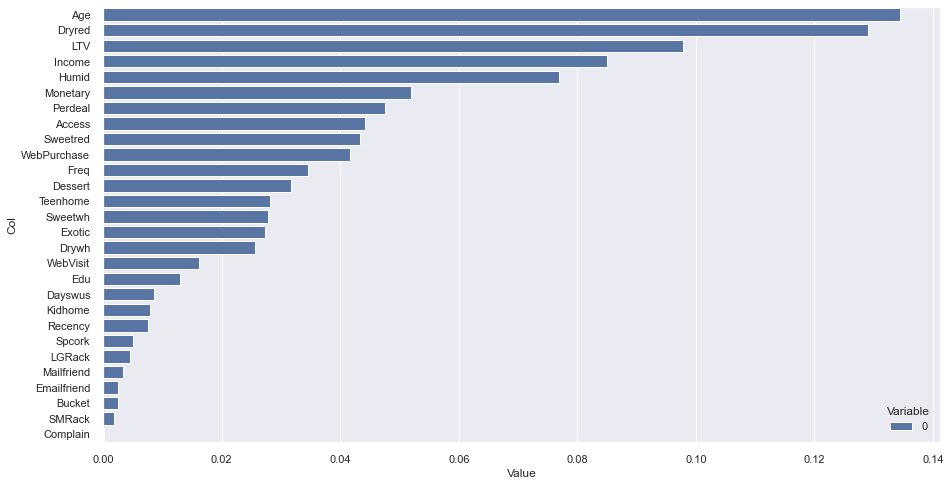

In [137]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)
plt.show()

In [138]:
selected_df=standard_df.loc[:,["Age","Dryred","LTV","Income","Perdeal","Humid","Monetary","Sweetred","WebPurchase","Teenhome"]]

<div class="alert alert-block alert-info">

### Self-Organizing Maps (SOM) + K-means
    
</div>

Considering the good results of the previous segmentation we decided to experiment with the SOM + K-means approach.

In [139]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

sm = sompy.SOMFactory().build(
    selected_df.values, 
    mapsize=(10, 10),
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=selected_df.columns
)
sm.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.038000, quantization error: 3.328297

 epoch: 2 ---> elapsed time:  0.038000, quantization error: 2.893418

 epoch: 3 ---> elapsed time:  0.036000, quantization error: 2.808437

 epoch: 4 ---> elapsed time:  0.037000, quantization error: 2.764108

 epoch: 5 ---> elapsed time:  0.037000, quantization error: 2.718346

 epoch: 6 ---> elapsed time:  0.037000, quantization error: 2.684609

 epoch: 7 ---> elapsed time:  0.037000, quantization error: 2.673168

 epoch: 8 ---> elapsed time:  0.038000, quantization error: 2.667925

 epoch: 9 ---> elapsed time:  0.037000, quantization error: 2.663052

 epoch: 10 ---> elapsed time:  0.037000, quantization error: 2.658184

 epoch: 11 ---> elapsed time:  0.037000, quantization error: 2.653257

 epoch: 12 ---> elapsed time:  0.037000, quantization error: 2.648224

 epoch: 13 ---> 

 epoch: 14 ---> elapsed time:  0.036000, quantization error: 1.199321

 epoch: 15 ---> elapsed time:  0.037000, quantization error: 1.199321

 epoch: 16 ---> elapsed time:  0.037000, quantization error: 1.199319

 epoch: 17 ---> elapsed time:  0.039000, quantization error: 1.199318

 epoch: 18 ---> elapsed time:  0.036000, quantization error: 1.199318

 epoch: 19 ---> elapsed time:  0.038000, quantization error: 1.199313

 epoch: 20 ---> elapsed time:  0.037000, quantization error: 1.199296

 epoch: 21 ---> elapsed time:  0.036000, quantization error: 1.199281

 epoch: 22 ---> elapsed time:  0.036000, quantization error: 1.199273

 epoch: 23 ---> elapsed time:  0.037000, quantization error: 1.199269

 epoch: 24 ---> elapsed time:  0.037000, quantization error: 1.199261

 epoch: 25 ---> elapsed time:  0.037000, quantization error: 1.199251

 epoch: 26 ---> elapsed time:  0.037000, quantization error: 1.199241

 epoch: 27 ---> elapsed time:  0.039000, quantization error: 1.199225

 epoch

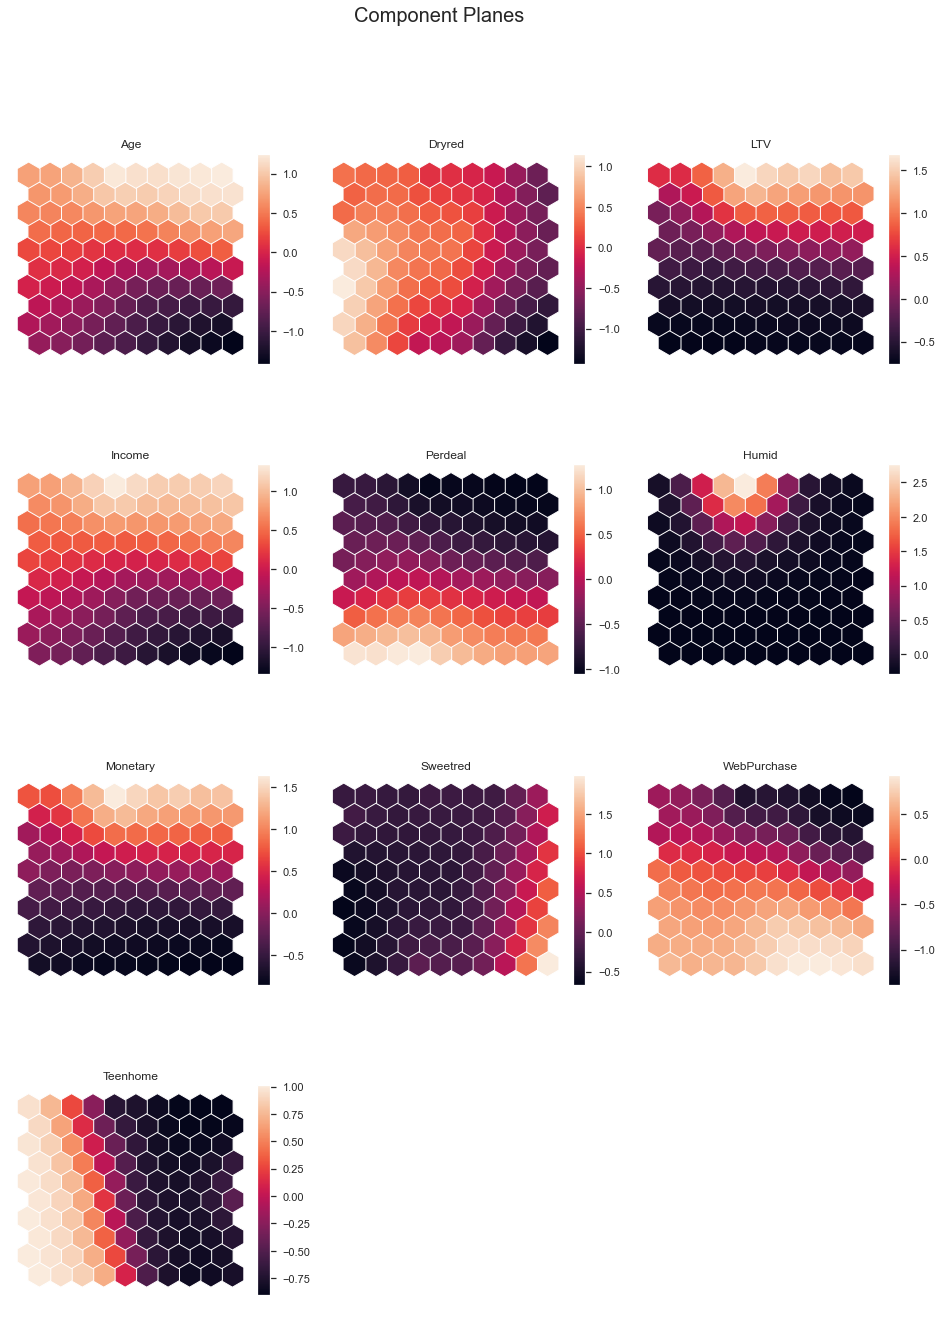

In [140]:
# Visualizing the Component planes (feature values)
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

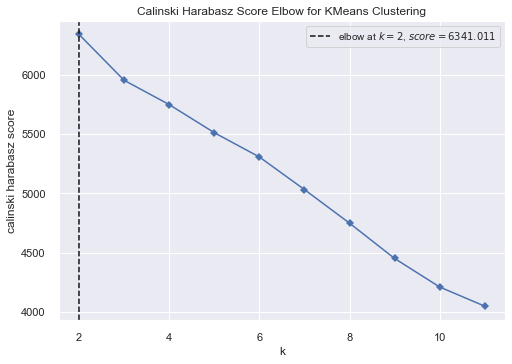

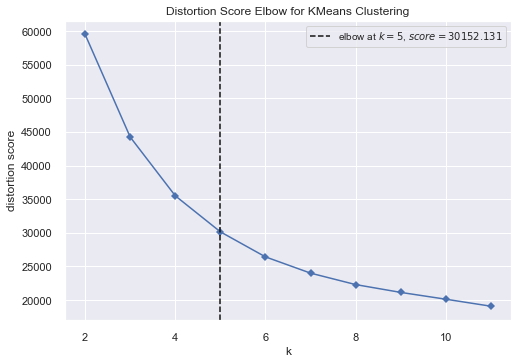

In [141]:
plotKElbow(cluster,selected_df,'calinski_harabasz')
plotKElbow(cluster,selected_df,'distortion')

In [142]:
selected_df.reset_index(inplace=True)
selected_df.drop("Custid",axis=1,inplace=True)

In [143]:
selected_df

,Age,Dryred,LTV,Income,Perdeal,Humid,Monetary,Sweetred,WebPurchase,Teenhome
0,1.163091,-0.594123,1.741049,0.760065,-1.052268,-0.289934,1.235007,-0.252469,-1.262237,-0.953630
1,1.748009,0.180407,1.267626,1.578539,-1.124337,-0.289934,1.448189,-0.781707,-1.804189,-0.953630
2,-1.410546,-0.809271,-0.739123,-1.537668,1.217903,-0.289934,-0.909450,1.599864,0.905570,-0.953630
3,0.636665,0.395554,0.002809,0.862701,-0.727958,-0.289934,0.423335,0.409078,-0.395114,1.048625
4,0.636665,0.352524,0.525694,0.799441,-0.980199,-0.289934,0.818117,-0.252469,-0.449310,1.048625
...,...,...,...,...,...,...,...,...,...,...
9796,-1.176579,-0.422006,0.811868,-0.582776,-0.908130,-0.289934,0.617567,0.541388,-0.611895,-0.953630
9797,1.631025,0.438583,0.953188,2.054698,-1.052268,3.449065,1.655055,-0.649398,0.146837,1.048625
9798,1.221583,-0.206858,1.454875,1.085600,-1.088302,-0.289934,1.340808,-0.914017,-1.316433,-0.953630
9799,0.987616,-0.120799,1.882370,1.504755,-1.016233,-0.289934,1.152892,1.202935,-0.340919,-0.953630


In [144]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = sm.cluster(kmeans)
hits  = HitMapView(12, 12,"Clustering", text_size=10)
#hits.show(sm, anotate=True, onlyzeros=Falsace, labelsize=7, cmap="Pastel1")

plt.show()

In [145]:
nodes = sm.get_node_vectors()

kmeans_nodes = pd.DataFrame(nodes, columns=selected_df.columns)
kmeans_nodes['kmeans_som_label']= nodeclus_labels

In [146]:
# Obtaining SOM's BMUs labels
bmus_map_kmeans = sm.find_bmu(selected_df)[0]  # get bmus for each observation in df

kmeans_bmus = pd.DataFrame(
    np.concatenate((selected_df, np.expand_dims(bmus_map_kmeans,1)), axis=1),
    index=selected_df.index, columns=np.append(selected_df.columns,"BMU")
)

In [147]:
# Get cluster labels for each observation
som_kmeans_final = kmeans_bmus.merge(kmeans_nodes['kmeans_som_label'], 'left', left_on="BMU", right_index=True)

In [148]:
som_kmeans_final["kmeans_som_label"].unique()

array([1, 0, 3, 2])

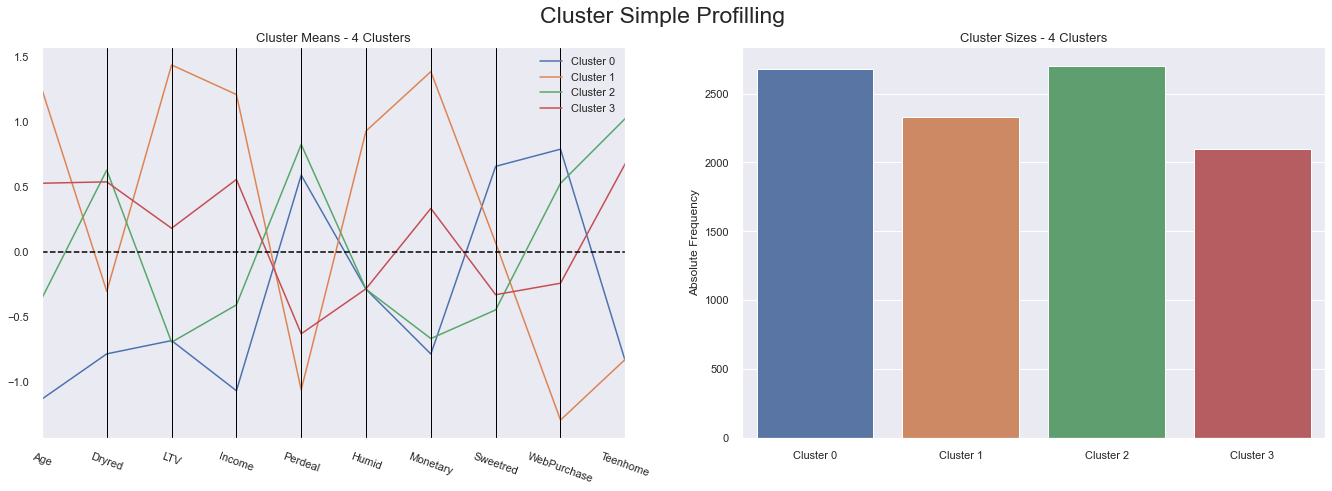

In [149]:
cluster_profiles(som_kmeans_final.drop('BMU',axis=1),["kmeans_som_label"], figsize=(23, 7),compar_titles=["K-Means + HC - Value"])

<div class="alert alert-block alert-info">

### K-means
    
</div>


In [150]:
kmeans=selected_df.copy()

In [151]:
kmeans['label']=kmeans_cluster(kmeans,4)

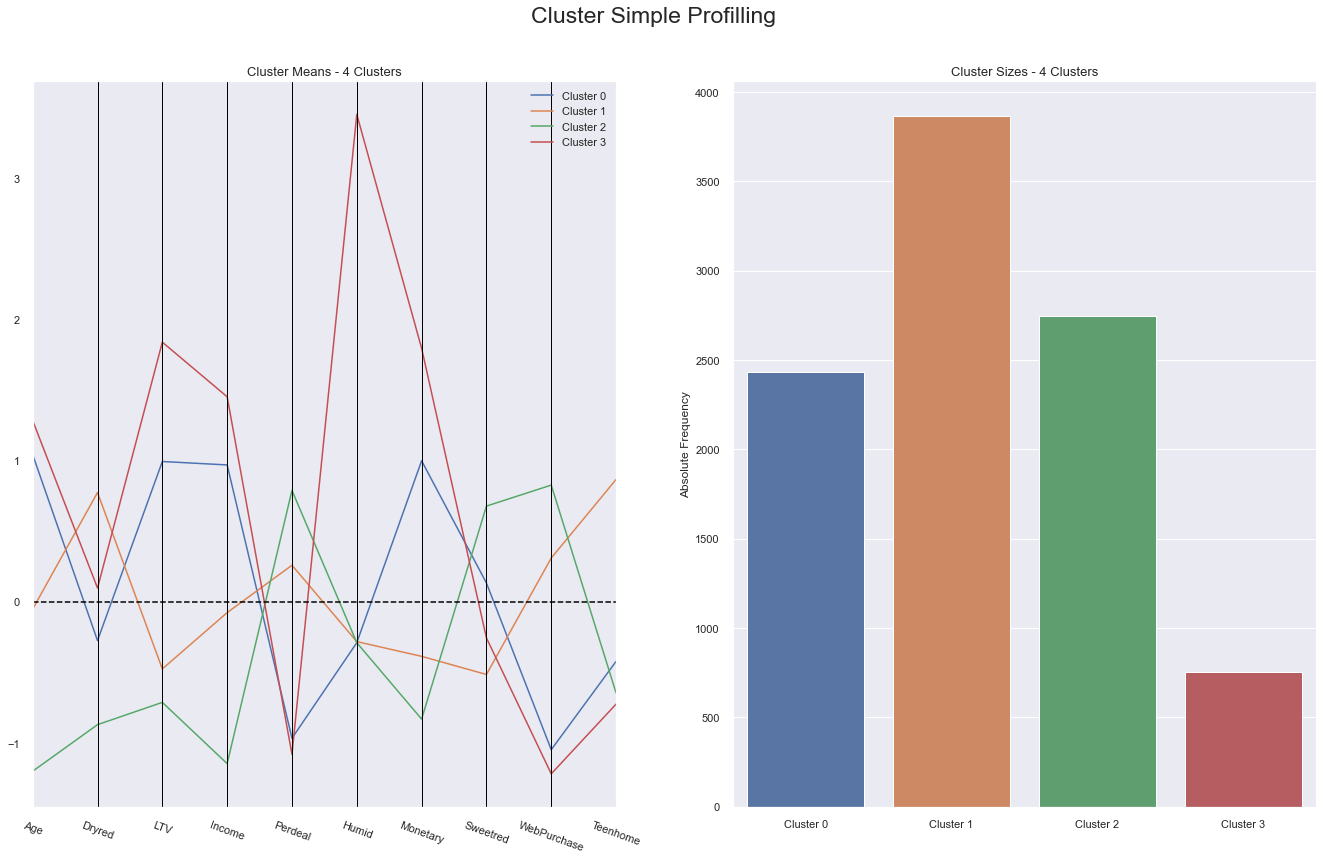

In [152]:
cluster_profiles(kmeans, ["label"], figsize=(23, 13), compar_titles=["K-Means - All Data"])

<div class="alert alert-block alert-success">

## 4) Decision Tree
    
</div>

In [153]:
som_kmeans_final

,Age,Dryred,LTV,Income,Perdeal,Humid,Monetary,Sweetred,WebPurchase,Teenhome,BMU,kmeans_som_label
0,1.163091,-0.594123,1.741049,0.760065,-1.052268,-0.289934,1.235007,-0.252469,-1.262237,-0.953630,1.0,1
1,1.748009,0.180407,1.267626,1.578539,-1.124337,-0.289934,1.448189,-0.781707,-1.804189,-0.953630,2.0,1
2,-1.410546,-0.809271,-0.739123,-1.537668,1.217903,-0.289934,-0.909450,1.599864,0.905570,-0.953630,91.0,0
3,0.636665,0.395554,0.002809,0.862701,-0.727958,-0.289934,0.423335,0.409078,-0.395114,1.048625,19.0,3
4,0.636665,0.352524,0.525694,0.799441,-0.980199,-0.289934,0.818117,-0.252469,-0.449310,1.048625,9.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
9796,-1.176579,-0.422006,0.811868,-0.582776,-0.908130,-0.289934,0.617567,0.541388,-0.611895,-0.953630,41.0,3
9797,1.631025,0.438583,0.953188,2.054698,-1.052268,3.449065,1.655055,-0.649398,0.146837,1.048625,6.0,1
9798,1.221583,-0.206858,1.454875,1.085600,-1.088302,-0.289934,1.340808,-0.914017,-1.316433,-0.953630,2.0,1
9799,0.987616,-0.120799,1.882370,1.504755,-1.016233,-0.289934,1.152892,1.202935,-0.340919,-0.953630,10.0,1


In [154]:
# Preparing the data
X = som_kmeans_final.drop(columns=['BMU','kmeans_som_label'])
y = som_kmeans_final.kmeans_som_label

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 92.20% of the customers correctly


In [155]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

Age            0.258737
Dryred         0.000000
LTV            0.325109
Income         0.000000
Perdeal        0.000000
Humid          0.032963
Monetary       0.000000
Sweetred       0.000000
WebPurchase    0.000000
Teenhome       0.383191
dtype: float64

In [156]:
#pd.Series(outliers_mcd.index.tolist() + outliers_if.index.tolist()).describe()
#pd.Series(pd.Series(outliers_mcd.index.tolist() + outliers_if.index.tolist()).unique()).describe()

#There aren't duplicate values 

In [157]:
df_out = pd.concat([outliers_mcd,outliers_if])

In [158]:
df_out

,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,LTV,...,WebVisit,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend
Custid,,,,,,,,,,,,,,,,,,,,,
1010.0,1109.0,20.0,14.0,23846.0,1.0,0.0,1.0,153.0,19.0,-1.0,...,7.0,0,0,0,0,0,0,0,0,0
1045.0,1208.0,19.0,13.0,33176.0,1.0,0.0,2.0,52.0,40.0,-3.0,...,6.0,1,0,0,0,0,1,0,1,1
1422.0,669.0,25.0,18.0,34304.0,0.0,1.0,1.0,538.0,12.0,0.0,...,6.0,0,0,0,0,0,0,0,0,0
1548.0,1136.0,19.0,13.0,37851.0,0.0,0.0,1.0,549.0,20.0,3.0,...,7.0,0,0,0,0,0,0,0,0,0
1647.0,601.0,23.0,17.0,47382.0,1.0,0.0,1.0,503.0,19.0,2.0,...,7.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10399.0,1234.0,18.0,12.0,21339.0,1.0,0.0,3.0,69.0,53.0,-11.0,...,8.0,0,0,0,0,0,0,0,1,1
10487.0,550.0,19.0,13.0,24303.0,1.0,0.0,2.0,28.0,29.0,-3.0,...,8.0,1,0,0,0,0,1,0,1,1
10586.0,654.0,77.0,14.0,120578.0,0.0,0.0,45.0,66.0,2412.0,1142.0,...,2.0,0,1,1,1,1,3,0,0,0


In [169]:
# Predicting the cluster labels of the outliers
out_norm = pd.DataFrame(scaler.transform(df_out[df.columns]),index=df_out.index, columns=df.columns)
out_norm['kmeans_som_label'] = dt.predict(out_norm[X.columns])
out_norm.head()

,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,LTV,...,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,kmeans_som_label
Custid,,,,,,,,,,,,,,,,,,,,,
1010.0,1.046126,-1.644513,-1.491678,-1.703196,1.184645,-0.953630,-1.160739,1.643656,-0.948928,-0.732057,...,-0.293844,-0.269577,-0.289934,-0.264975,-0.107515,-0.453206,-0.107029,-0.331801,-0.226929,0
1045.0,1.535884,-1.703004,-2.030225,-1.359850,1.184645,-0.953630,-1.075518,-0.115707,-0.915766,-0.739123,...,3.403162,-0.269577,-0.289934,-0.264975,-0.107515,1.465530,-0.107029,3.013857,4.406671,0
1422.0,-1.130578,-1.352054,0.662510,-1.318339,-0.844135,1.048625,-1.160739,8.350136,-0.959982,-0.728524,...,-0.293844,-0.269577,-0.289934,-0.264975,-0.107515,-0.453206,-0.107029,-0.331801,-0.226929,2
1548.0,1.179696,-1.703004,-2.030225,-1.187808,-0.844135,-0.953630,-1.160739,8.541750,-0.947349,-0.717925,...,-0.293844,-0.269577,-0.289934,-0.264975,-0.107515,-0.453206,-0.107029,-0.331801,-0.226929,0
1647.0,-1.466977,-1.469037,0.123963,-0.837065,1.184645,-0.953630,-1.160739,7.740456,-0.948928,-0.721458,...,-0.293844,-0.269577,-0.289934,-0.264975,-0.107515,-0.453206,-0.107029,-0.331801,-0.226929,0


In [170]:
# Predicting the cluster labels of the outliers
df_out['kmeans_som_label'] = dt.predict(out_norm[X.columns])
df_out.head()

,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,LTV,...,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,kmeans_som_label
Custid,,,,,,,,,,,,,,,,,,,,,
1010.0,1109.0,20.0,14.0,23846.0,1.0,0.0,1.0,153.0,19.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
1045.0,1208.0,19.0,13.0,33176.0,1.0,0.0,2.0,52.0,40.0,-3.0,...,1,0,0,0,0,1,0,1,1,0
1422.0,669.0,25.0,18.0,34304.0,0.0,1.0,1.0,538.0,12.0,0.0,...,0,0,0,0,0,0,0,0,0,2
1548.0,1136.0,19.0,13.0,37851.0,0.0,0.0,1.0,549.0,20.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1647.0,601.0,23.0,17.0,47382.0,1.0,0.0,1.0,503.0,19.0,2.0,...,0,0,0,0,0,0,0,0,0,0


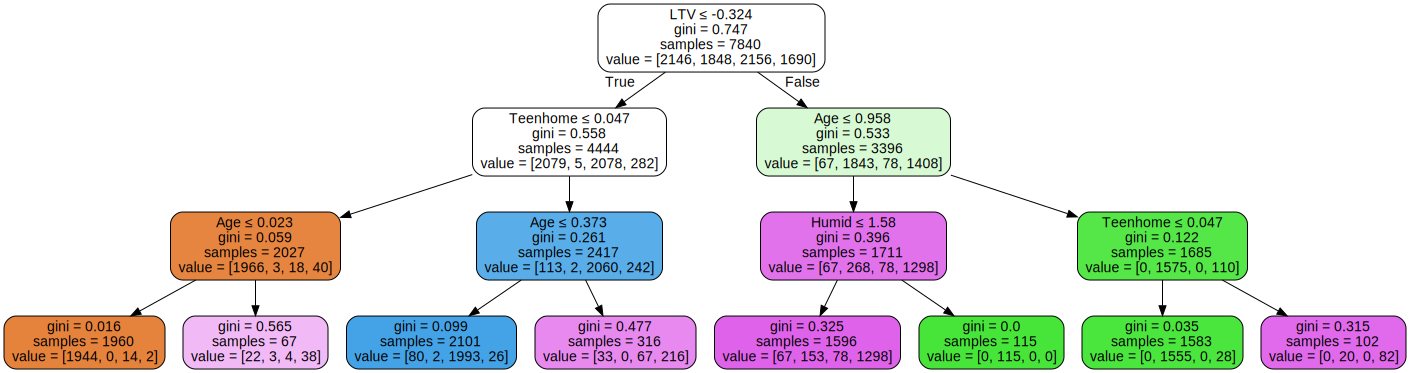

In [171]:
# Visualizing the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True)  
graphviz.Source(dot_data)